In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd,gluon,nd
from mxnet.gluon import data as gdata,loss as gloss,nn

In [2]:
n_train ,n_test,true_w,true_b = 1000,1000,[1.2,-3.4,5.6],7
features = nd.random.normal(shape=(n_test+n_train,1))
poly_features = nd.concat(features,nd.power(features,2),nd.power(features,3))
labels = (true_w[0]*poly_features[:,0] + true_w[1]*poly_features[:,1]+true_w[2]*poly_features[:,2] + true_b)
labels += nd.random.normal(scale=0.01,shape=labels.shape)

In [3]:
features[:2],poly_features[:2],labels[:2]

(
 [[1.1630785]
  [0.4838046]]
 <NDArray 2x1 @cpu(0)>,
 
 [[1.1630785  1.3527517  1.5733565 ]
  [0.4838046  0.2340669  0.11324265]]
 <NDArray 2x3 @cpu(0)>,
 
 [12.605538  7.436871]
 <NDArray 2 @cpu(0)>)

In [4]:
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None,figsize=(3.5,2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals,y2_vals,linestyle=':')
        d2l.plt.legend(legend)

In [5]:
num_epochs,loss = 100,gloss.L2Loss()

def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10,train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels),batch_size,shuffle=True)
    trainer = gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.01})

    train_ls,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            with autograd.record():
                l = loss(net(X),y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),test_labels).mean().asscalar())
    print('final epoch: train loss',train_ls[-1],'test loss',test_ls[-1])
    semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',range(1,num_epochs+1),test_ls,['train','test'])
    print('weight: ',net[0].weight.data().asnumpy())
    print('bias: ',net[0].bias.data().asnumpy())

final epoch: train loss 4.899183e-05 test loss 4.9581075e-05
weight:  [[ 1.2007984 -3.3997476  5.6000576]]
bias:  [7.000419]


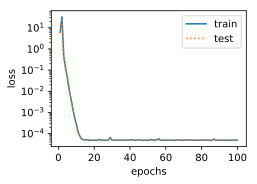

In [6]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],labels[:n_train],labels[n_train:])

final epoch: train loss 145.71036 test loss 88.5375
weight:  [[19.231806]]
bias:  [3.8907325]


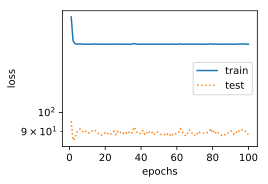

In [7]:
# 欠拟合
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],labels[n_train:])

final epoch: train loss 1.2562488 test loss 85.888794
weight:  [[2.4882417 2.286613  2.4114997]]
bias:  [3.2179554]


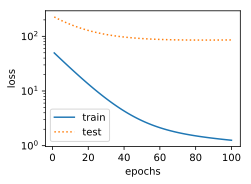

In [8]:
# 过拟合
fit_and_plot(poly_features[0:2,:],poly_features[n_train:,:],labels[0:2],labels[n_train:])